**Importing the Dependecies**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Read the dataset**

In [ ]:
heart_data = pd.read_csv('gdrive/MyDrive/heart.csv')
#print the first 5 rows
heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart_data.shape

(1025, 14)

In [ ]:
#check for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#information about the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

[]

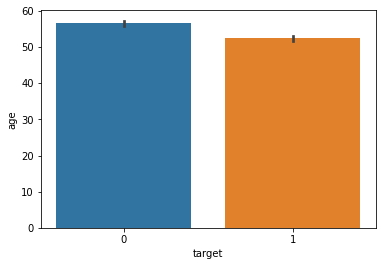

In [ ]:
#this plots the target variable against the age variable
sns.barplot(x = 'target', y = 'age', data = heart_data)
plt.plot()

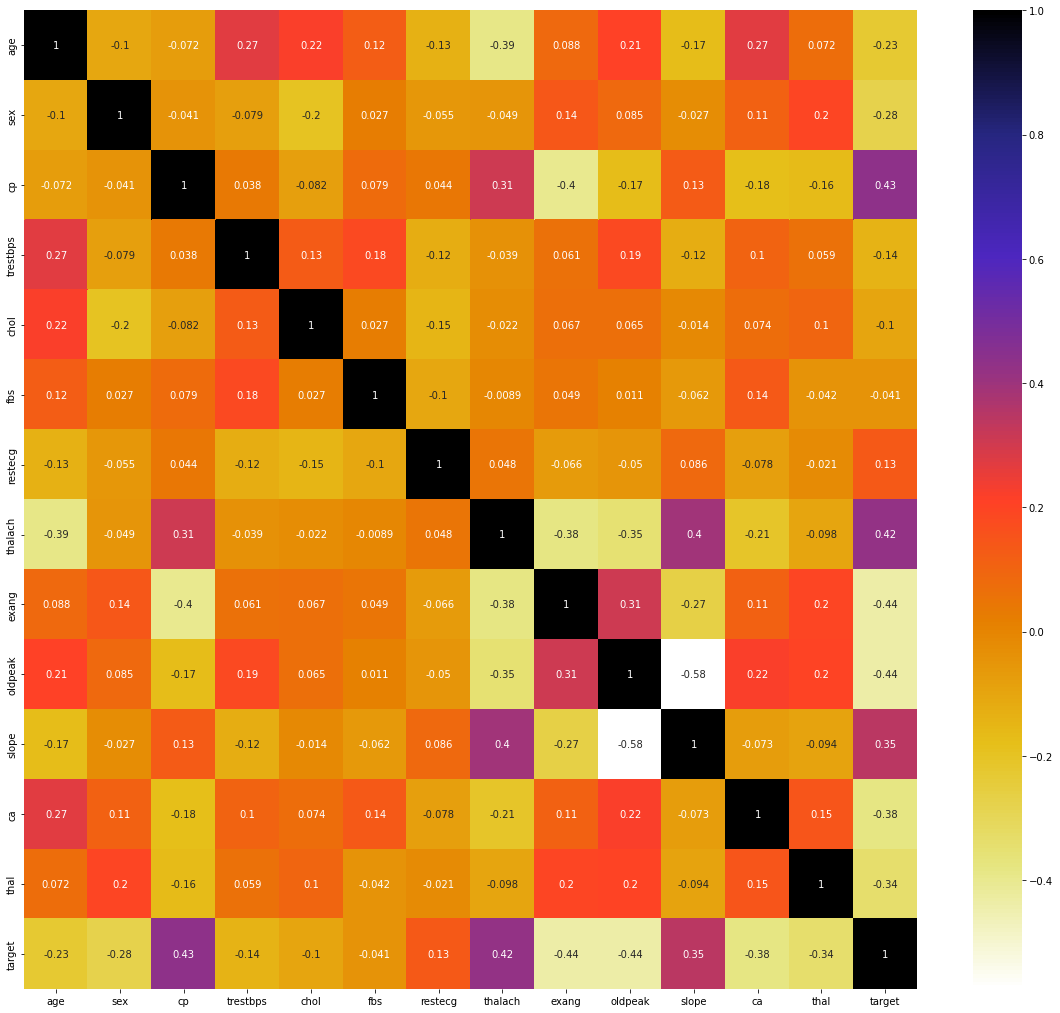

In [ ]:
#this shows a correlation of all the variables in the dataset
plt.figure(figsize=(20,18))
corr = heart_data.corr()
sns.heatmap(corr, annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
#this separates the target column from other columns
x = heart_data.drop(columns='target', axis=1)
y = heart_data['target']
print(x)
print(y)

      age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0      52    1   0       125   212  ...      0      1.0      2   2     3
1      53    1   0       140   203  ...      1      3.1      0   0     3
2      70    1   0       145   174  ...      1      2.6      0   0     3
3      61    1   0       148   203  ...      0      0.0      2   1     3
4      62    0   0       138   294  ...      0      1.9      1   3     2
...   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
1020   59    1   1       140   221  ...      1      0.0      2   0     2
1021   60    1   0       125   258  ...      1      2.8      1   1     3
1022   47    1   0       110   275  ...      1      1.0      1   1     2
1023   50    0   0       110   254  ...      0      0.0      2   0     2
1024   54    1   0       120   188  ...      0      1.4      1   1     3

[1025 rows x 13 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    

In [ ]:
#splitting the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify = y, random_state=2)

In [ ]:
x.shape, x_train.shape, x_test.shape

((1025, 13), (820, 13), (205, 13))

**Import Classifier Algorithms**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNC = KNeighborsClassifier()
LRG = LogisticRegression()

In [ ]:
#here we fit our training dataset into the model
KNC.fit(x_train, y_train)
LRG.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#prediction for the test data (x_test)
KNC_prediction = KNC.predict(x_test)
LRG_prediction = LRG.predict(x_test)

#prediction for the training data (x_train)
KNC_x_train_prediction = KNC.predict(x_train)
LRG_x_train_prediction = LRG.predict(x_train)

**Classification Evaluation Metrics**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
accuracy_KNC = metrics.accuracy_score(y_test, KNC_prediction)
accuracy_LRG = metrics.accuracy_score(y_test, LRG_prediction)

In [ ]:
#print accuracy score for training dataset
print('Accuracy on training data for KNearestNeigbour: ', accuracy_score(y_train, KNC_x_train_prediction))
print('Accuracy on training data for LogisticRegression: ', accuracy_score(y_train, LRG_x_train_prediction))

Accuracy on training data for KNearestNeigbour:  0.9060975609756098
Accuracy on training data for LogisticRegression:  0.8524390243902439


In [ ]:
#print accuracy score for test dataset
print('Test accuracy for KNearestNeigbour: ', accuracy_KNC)
print('Test accuracy for LogisticRegression: ', accuracy_LRG)

Test accuracy for KNearestNeigbour:  0.7219512195121951
Test accuracy for LogisticRegression:  0.8048780487804879


In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 23 kB/s 


## **Ensemble Method**

**Boosting**


**Import Classifier Boosting Algorithms**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

In [ ]:
#We now create an object of class LogisticRegression() to train the model on
CBC = CatBoostClassifier()
GBC = GradientBoostingClassifier()

In [ ]:
#here we fit our training dataset into the model
CBC.fit(x_train, y_train)
GBC.fit(x_train, y_train)

Learning rate set to 0.009465
0:	learn: 0.6827882	total: 47.4ms	remaining: 47.3s
1:	learn: 0.6725183	total: 48.6ms	remaining: 24.3s
2:	learn: 0.6629769	total: 49.7ms	remaining: 16.5s
3:	learn: 0.6545742	total: 50.9ms	remaining: 12.7s
4:	learn: 0.6467072	total: 52.2ms	remaining: 10.4s
5:	learn: 0.6390098	total: 53.3ms	remaining: 8.83s
6:	learn: 0.6303977	total: 54.4ms	remaining: 7.72s
7:	learn: 0.6214170	total: 55.8ms	remaining: 6.92s
8:	learn: 0.6129428	total: 57.1ms	remaining: 6.28s
9:	learn: 0.6039873	total: 58.3ms	remaining: 5.77s
10:	learn: 0.5954090	total: 59.3ms	remaining: 5.33s
11:	learn: 0.5870791	total: 60.4ms	remaining: 4.97s
12:	learn: 0.5796609	total: 61.6ms	remaining: 4.67s
13:	learn: 0.5729011	total: 62.7ms	remaining: 4.42s
14:	learn: 0.5656516	total: 63.9ms	remaining: 4.2s
15:	learn: 0.5587883	total: 65ms	remaining: 4s
16:	learn: 0.5526586	total: 66.2ms	remaining: 3.83s
17:	learn: 0.5480059	total: 67.3ms	remaining: 3.67s
18:	learn: 0.5421721	total: 68.4ms	remaining: 3.53

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#prediction for the test data (x_test)
CBC_prediction = CBC.predict(x_test)
GBC_prediction = GBC.predict(x_test)

#prediction for the training data (x_train)
CBC_x_train_prediction = CBC.predict(x_train)
GBC_x_train_prediction = GBC.predict(x_train)

In [ ]:
accuracy_CBC= metrics.accuracy_score(y_test, CBC_prediction)
accuracy_KNC= metrics.accuracy_score(y_test, KNC_prediction)
accuracy_GBC= metrics.accuracy_score(y_test, GBC_prediction)

In [ ]:
#print accuracy score for training dataset
print('Accuracy on training data for CatBoostClassifier: ',accuracy_score(y_train,CBC_x_train_prediction))
print('Accuracy on training data for GradientBoostingClassifier: ',accuracy_score(y_train,GBC_x_train_prediction))

Accuracy on training data for CatBoostClassifier:  1.0
Accuracy on training data for GradientBoostingClassifier:  0.9878048780487805


In [ ]:
print('Test accuracy for CatBoostClassifier: ',accuracy_CBC)
print('Test accuracy for GradientBoostingClassifier: ',accuracy_GBC)

Test accuracy for CatBoostClassifier:  1.0
Test accuracy for GradientBoostingClassifier:  0.9853658536585366


**Stacking**

In [ ]:
# Define estimators
from sklearn.ensemble import StackingClassifier
estimators = [
    ('KNC', KNC),
    ('GBC', GBC),
    ('CBC', CBC)
]
# Build stack model
stack_model = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
# train stacked model
stack_model.fit(x_train,y_train)
#make predictions
y_train_prediction = stack_model.predict(x_train)
y_test_prediction = stack_model.predict(x_test)
#Train data model performance
stack_model_train_accuracy= metrics.accuracy_score(y_train, y_train_prediction)
#Test data model performance
stack_model_test_accuracy= metrics.accuracy_score(y_test, y_test_prediction)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6502678	total: 5.59ms	remaining: 1.11s
5:	learn: 0.6426985	total: 6.75ms	remaining: 1.12s
6:	learn: 0.6358918	total: 7.88ms	remaining: 1.12s
7:	learn: 0.6270890	total: 9ms	remaining: 1.12s
8:	learn: 0.6200006	total: 10.1ms	remaining: 1.11s
9:	learn: 0.6125525	total: 11.2ms	remaining: 1.11s
10:	learn: 0.6055441	total: 12.5ms	remaining: 1.13s
11:	learn: 0.5980847	total: 13.7ms	remaining: 1.12s
12:	learn: 0.5905951	total: 14.8ms	remaining: 1.12s
13:	learn: 0.5834215	total: 15.9ms	remaining: 1.12s
14:	learn: 0.5766243	total: 17ms	remaining: 1.12s
15:	learn: 0.5708945	total: 18.2ms	remaining: 1.12s
16:	learn: 0.5648491	total: 19.3ms	remaining: 1.11s
17:	learn: 0.5597155	total: 20.4ms	remaining: 1.11s
18:	learn: 0.5529196	total: 21.4ms	remaining: 1.11s
19:	learn: 0.5481925	total: 22.4ms	remaining: 1.09s
20:	learn: 0.5414907	total: 23.5ms	remaining: 1.09s
21:	learn: 0.5371161	total: 24.4ms	remaining: 1.08s
22:	learn: 0.5304837	tot

In [ ]:
print('\n',"Stack model performance on the Training set")
print('stack_model_train_accuracy: ', stack_model_train_accuracy)
print("Stack model performance on the Testing set")
print('stack_model_test_accuracy: ', stack_model_test_accuracy)


 Stack model performance on the Training set
stack_model_train_accuracy:  1.0
Stack model performance on the Testing set
stack_model_test_accuracy:  1.0
